## Library import


In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import xgboost as xgb
import matplotlib.pyplot as plt


## Data Load, Predictor/Response variable separation

In [ ]:
# Load the dataset
df = pd.read_csv("/Users/yoolkyupark/Downloads/healthcare_dataset.csv")

# Quick overview
print(df.head())
print(df.info())
print(df.describe(include="all"))

# Set Billing Amount as the target variable
TARGET_COL = "Billing Amount"

# Convert categorical columns to numerical using Label Encoding
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]



   Age  Gender Medical Condition Admission Type Blood Type Insurance Provider  \
0   58    Male            Cancer         Urgent        AB-         Blue Cross   
1   48    Male           Healthy       Elective         A+         Blue Cross   
2   34  Female            Cancer         Urgent         O+         Blue Cross   
3   62  Female           Healthy      Emergency         A+           Medicare   
4   27  Female           Obesity      Emergency         O+              Other   

   Medication  Test Results  Stay Duration Age Group Room Tier  Is Chronic  \
0       Other  Inconclusive              8     36-50  Standard       False   
1   Ibuprofen      Abnormal              2       65+   Private       False   
2  Penicillin        Normal              8     51-65    Shared       False   
3   Ibuprofen      Abnormal              6     19-35    Shared       False   
4   Ibuprofen      Abnormal              4     19-35    Shared       False   

   Billing Amount  
0    16728.863904  
1   

## Convert categorical variables into factors

In [15]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = X.select_dtypes(include=["object", "bool"]).columns.tolist()

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

X.head()


,Age,Gender,Medical Condition,Admission Type,Blood Type,Insurance Provider,Medication,Test Results,Stay Duration,Age Group,Room Tier,Is Chronic
0,58,1,0,2,1,1,2,1,8,1,2,0
1,48,1,2,0,0,1,1,0,2,3,0,0
2,34,0,0,2,3,1,3,2,8,2,1,0
3,62,0,2,1,0,2,1,0,6,0,1,0
4,27,0,3,1,3,3,1,0,4,0,1,0


## Training/Test data separation.
### 80% of the total dataset was used to train the model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

# Create the model with some initial hyperparameters
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## Prediction
### RMSE, R^2 values are calculated

In [18]:
# Predictions on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

n = len(y_test)            # number of observations
p = X_test.shape[1]        # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print("RMSE:", rmse)
print("R^2 score:", r2)
print("Explained Variance Score:", evs)



RMSE: 2524.4322549997655
R^2 score: 0.6942537468101257
Explained Variance Score: 0.7157877151712767


               Feature  Importance
11          Is Chronic    0.793981
10           Room Tier    0.120347
8        Stay Duration    0.016745
0                  Age    0.011913
4           Blood Type    0.009075
5   Insurance Provider    0.008573
9            Age Group    0.007999
7         Test Results    0.007736
6           Medication    0.007195
3       Admission Type    0.006629
1               Gender    0.005734
2    Medical Condition    0.004073


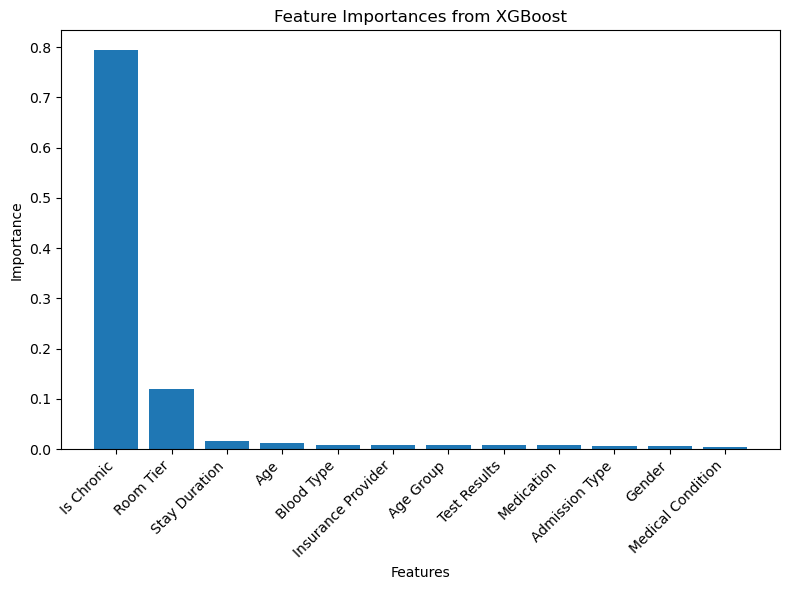

In [11]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Pair them and sort by importance descending
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Print the top features
print(feature_importance_df)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from XGBoost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
